In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import string
from collections import Counter
from sklearn.decomposition import NMF

Import the files


In [24]:

filename2='ArticlesApril2018.csv'
data1=pd.read_csv(filename2,index_col=0,low_memory=False)
data1=data1['keywords']

dataj=pd.read_csv('ArticlesJan2018.csv',index_col=0,low_memory=False)
dataf=pd.read_csv('ArticlesFeb2018.csv',index_col=0,low_memory=False)
datam=pd.read_csv('ArticlesMarch2018.csv',index_col=0,low_memory=False)
dataa=pd.read_csv('ArticlesApril2018.csv',index_col=0,low_memory=False)

dataj2=dataj.append([dataf,datam,dataa],ignore_index=True)

dataj2=dataj2[['articleID','keywords']]

cdataj=pd.read_csv('CommentsJan2018.csv',index_col=0,low_memory=False)
cdataf=pd.read_csv('CommentsFeb2018.csv',index_col=0,low_memory=False)
cdatam=pd.read_csv('CommentsMarch2018.csv',index_col=0,low_memory=False)
cdataa=pd.read_csv('CommentsApril2018.csv',index_col=0,low_memory=False)
    

cdataj2=dataj.append([cdataf,cdatam,cdataa],ignore_index=True)

cdataj2=cdataj2[['articleID','userID']]


/Users/pdhe/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [33]:
cdataj2.head

<bound method NDFrame.head of                        articleID      userID
0       5a7101c110f40f00018be961         NaN
1       5a70fc1210f40f00018be950         NaN
2       5a70f8f810f40f00018be943         NaN
3       5a70eb8110f40f00018be925         NaN
4       5a70d1d210f40f00018be8d9         NaN
5       5a70d1ad10f40f00018be8d8         NaN
6       5a70c57b10f40f00018be8ac         NaN
7       5a70b7f310f40f00018be885         NaN
8       5a70b2e710f40f00018be876         NaN
9       5a70b22d10f40f00018be86f         NaN
10      5a70af8c10f40f00018be864         NaN
11      5a70acb510f40f00018be85c         NaN
12      5a70a17f10f40f00018be830         NaN
13      5a70915310f40f00018be7f6         NaN
14      5a70912a10f40f00018be7f5         NaN
15      5a708d4710f40f00018be7e8         NaN
16      5a707a5810f40f00018be7af         NaN
17      5a7075f610f40f00018be7a1         NaN
18      5a70723a10f40f00018be796         NaN
19      5a70693710f40f00018be777         NaN
20      5a70635610f40f000

Process the data to make a X matrix for NMF

In [4]:

user=cdataj2['userID'].unique()
article=cdataj2['articleID'].unique()
user=user.tolist()
article=article.tolist()

Xmat=np.zeros((len(user),len(article)))

for i in range(len(cdataj2)):
    try:
        articlepointer=article.index(cdataj2['articleID'].iloc[i])
        userpointer=user.index(cdataj2['userID'].iloc[i])
        Xmat[userpointer,articlepointer]+=1
    except:
        pass
    

Use the NMF model to lear W and H matrices 

In [5]:
model = NMF(n_components=25, init='random', random_state=0)
W = model.fit_transform(Xmat)
H = model.components_


Using another features, which is the keywords and the corresponding article to learn another W and H

In [21]:

keywords=[]
for i in range(len(dataj2)):
    KK=dataj2['keywords'].iloc[i]#.split(',')
    for j in KK:
        keywords.append(j)


#remove all the symbols
import re
for i in range(len(keywords)):
    keywords[i]=re.sub('\[','',keywords[i])
    keywords[i]=re.sub('\]', '',keywords[i])
    keywords[i]=re.sub(',', '',keywords[i])
    keywords[i]=re.sub('\'', '',keywords[i])
    keywords[i]=re.sub('\"', '',keywords[i])


keywords=list(set(keywords))



In [22]:
#keywords
keywords

['',
 ' WikiLeaks',
 'Golf',
 ' Margot (1980- )',
 ' Ireland',
 ' Bill (1967- )',
 ' Purdue Pharma',
 ' Wu-Tang Clan',
 ' Van',
 ' Leukemia',
 ' Libya',
 ' Walesa',
 ' Yeast',
 ' Dershowitz',
 ' Hips',
 ' Railroad Accidents and Safety',
 ' Ridloff',
 'Whales and Whaling',
 ' Theodore',
 'Libby',
 ' Mulvaney',
 ' Washington Heights (Manhattan',
 ' Library of America',
 ' Welser-Most',
 ' News and News Media',
 'Birds',
 ' Government Accountability Office',
 ' Home Appliances',
 ' Stahl',
 ' Think Tanks',
 ' Mikie',
 ' United States Agency for International Development',
 ' Sisters of the Blessed Sacrament (Greenburgh',
 ' Crocodiles',
 ' Nabeel',
 ' Harrison',
 ' Patton',
 'Sentences (Criminal)',
 ' Uihlein',
 ' Village People (Music Group)',
 'Birth Rates',
 ' Arms Trade',
 ' Middle East',
 ' Maria',
 'Anti-Semitism',
 ' Abramovich',
 ' Khojasteh',
 'Dolores-Schmidt',
 ' Affordable Housing',
 ' Ethics (Personal)',
 ' Camden (NJ)',
 'Internal Revenue Service',
 ' Beyond BookSmart',
 ' Y

Construct another X matrix for NMF, Which involves reading each keywords in a keywords list and change the value in corresponding locations of the X matrix

In [25]:

dataj3=dataj2

for i in range(len(dataj2)):
    KK=dataj2['keywords'].iloc[i].split(',')
    #for j in KK:
    dataj3['keywords'].iloc[i]=KK

Xmat2=np.zeros((len(keywords),len(article)))

for i in range(len(dataj2)):
    try:
        articlepointer=article.index(dataj2['articleID'].iloc[i])
        for eachword in dataj2['keywords'].iloc[i]:
            
            eachword=re.sub('\[','',eachword)
            eachword=re.sub('\]', '',eachword)
            eachword=re.sub(',', '',eachword)
            eachword=re.sub('\'', '',eachword)
            eachword=re.sub('\"', '',eachword)
            keywordspointer=keywords.index(eachword)
            Xmat2[keywordspointer,articlepointer]+=1
    except:
        pass

Build another NMF matrix

In [26]:
    
model2 = NMF(n_components=25, init='random', random_state=0)
W2 = model2.fit_transform(Xmat2)
H2 = model2.components_

err1=sum(sum(abs(Xmat-np.dot(W,H))))/sum(sum(Xmat))

err2=sum(sum(abs(Xmat2-np.dot(W2,H2))))/sum(sum(Xmat2))

In [16]:
err1

1.8732507423522284

In [27]:
err2

1.4723928377828652

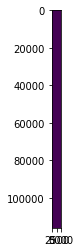

In [31]:
plt.imshow(Xmat)

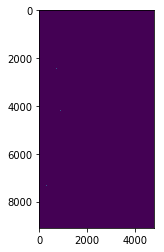

In [32]:
plt.imshow(Xmat2)

For a given user, we can find similar users form W matrx, similarly, from H matrix, we can locate articles which have similar keywords and recommend the user other articles based on both keywords and other users' preferences.